In [13]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import os
import random

In [3]:
#lookup = pd.read_csv('days_weeks_lookup.csv')
#week_lookup = {lookup['Date'].tolist()[i]: lookup['week_ID'].tolist()[i] for i in range(len(lookup))}

data = pd.DataFrame()
for i in ['UKc', 'UKt', 'USc', 'USt']:
    temp_df = pd.read_csv(f'/Users/jericho/Documents/csi/ts_phonecalls/data/{i}.txt',sep='\t')
    temp_df['Source'] = [i]*len(temp_df)
    data = pd.concat([data,temp_df],axis=0)

#print(type(data['time'].tolist()[0]))
data['time'] = pd.to_datetime(data['time'], infer_datetime_format=True)
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)
#print(type(data['time'].tolist()[0]))
#print(data.shape)
#data.head() 

In [4]:
# See if aggregated data is cached; if so, import, if not, aggregate data and cache
counter = 0
loc = '/Users/jericho/Documents/csi/csi-research/Data/ts_call_datasets/'
files = os.listdir(loc)
if len(files) > 1:
    pair_datasets = {}
    for file in files:
        if file != '.DS_Store':
            pair_datasets[file] = pd.read_csv(loc+file)
if 'pair_datasets' not in locals():
    pairs = data['pair'].unique().tolist()
    pair_datasets = {}
    for p in pairs:
        temp_df = data[data['pair']==p]
        time_range = temp_df['time'].max() - temp_df['time'].min()
        temp_df = temp_df[temp_df['Source'].isin(['UKc','USc','ITc'])]
        if time_range.days > 50:
            pair_datasets[p] = temp_df
    for k,v in pair_datasets.items():
        v.to_csv(loc+k, index=False)


In [5]:
targets = []
for k,v in pair_datasets.items():
    if len(v) > 200:
        targets.append(k)

print(len(targets))

97


In [6]:
class mc_ts():
    def __init__(self,t):
        t = [i for i in t if i > 0]
        self.t = t

    def find_distr(self): 
        #benchmarked: 100k runs = 0.85 seconds
        self.day_counts = defaultdict(int)
        for i in self.t: self.day_counts[i] += 1
        call_counts = defaultdict(int)
        for v in self.day_counts.values(): call_counts[v] += 1
        call_counts[0] = max(self.t) - len(self.day_counts) - min(self.t)
        call_sum = sum(call_counts.values())
        call_pdf_boost = {k: v/call_sum for k,v in call_counts.items()}
        self.pdf_boost = call_pdf_boost

    def obs_call_array(self):
        x = np.zeros(max(self.day_counts.keys())-min(self.day_counts.keys()))
        x = [x[i]+self.day_counts[i+1+min(self.day_counts.keys())] for i in range(len(x))]
        x = [sum(x[:i+1]) for i in range(len(x))]
        self.obs_calls = x

    def rand_draw(self):
        def find_pos(array, val):
            temp_array = [i for i in array if i < val]
            return len(temp_array)

        rate = [i for i in self.pdf_boost.keys()]
        p    = [i for i in self.pdf_boost.values()]
        c    = [sum(p[:i+1]) for i in range(len(p))]
        r    = np.random.rand(max(self.t)-min(self.t))
        rp   = [find_pos(c, r[i]) for i in range(len(r))]
        calls = [rate[i] for i in rp]
        cumu_calls = [sum(calls[:i+1]) for i in range(len(calls))]
        self.calls = cumu_calls

    def calc_error(self):
        e = sum([abs(self.obs_calls[i]-self.calls[i]) for i in range(len(self.obs_calls))]) 
        #e /= len(self.obs_calls)
        e /= sum(self.obs_calls)
        #print(e)
        self.e = e

In [52]:
mc = mc_ts(pair_datasets[targets[27]]['t'].tolist())
mc.find_distr()
mc.t

[2,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 13,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 18,
 20,
 22,
 23,
 24,
 24,
 24,
 25,
 27,
 27,
 27,
 27,
 27,
 27,
 30,
 32,
 32,
 33,
 38,
 38,
 39,
 39,
 39,
 39,
 39,
 40,
 40,
 41,
 41,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 43,
 43,
 43,
 44,
 45,
 46,
 47,
 47,
 48,
 56,
 58,
 58,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 61,
 61,
 64,
 64,
 65,
 65,
 65,
 66,
 66,
 66,
 66,
 66,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 70,
 70,
 71,
 71,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 75,
 75,
 75,
 75,
 76,
 76,
 76,
 76,
 77,
 78,
 79,
 79,
 79,
 79,
 79,
 80,
 81,
 81,
 81,
 81,
 85,
 92,
 106,
 107,
 107,
 107,
 107,
 107,
 111,
 111,
 113,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 115,
 115,
 115,
 117,
 121,
 

In [48]:
class mc_ts_daily():
    def __init__(self,t):
        self.input_t = t
        t = [i for i in t if i > 0]
        t_arrays = [[],[],[],[],[],[],[]]
        for i in range(len(t)):
            t_arrays[i%7].append(t[i])
        self.t = t_arrays

    def find_distr(self): 
        pdf_boosts = {}
        day_counts_outer = {}
        for i in range(len(self.t)):
            day_counts = defaultdict(int)
            for j in self.t[i]: day_counts[j] += 1
            call_counts = defaultdict(int)
            for v in day_counts.values(): call_counts[v] += 1
            call_counts[0] = max(self.t[i]) - len(day_counts) - min(self.t[i])
            call_sum = sum(call_counts.values())
            call_pdf_boost = {k: v/call_sum for k,v in call_counts.items()}
            pdf_boosts[i] = call_pdf_boost
            day_counts_outer[i] = day_counts
        self.pdf_boost = pdf_boosts
        self.day_counts = day_counts_outer

    def obs_call_array(self):
        day_counts = defaultdict(int)
        for i in self.input_t: day_counts[i] += 1
        x = np.zeros(max(day_counts.keys())-min(day_counts.keys()))
        x = [x[i]+day_counts[i+1+min(day_counts.keys())] for i in range(len(x))]
        x = [sum(x[:i+1]) for i in range(len(x))]
        self.obs_calls = x

    def rand_draw(self):
        def find_pos(array, val):
            temp_array = [i for i in array if i < val]
            return len(temp_array)
        calls = []
        cumu_calls = []

        day_of_week = [i%7 for i in range(max(self.input_t)-min(self.input_t))]
        # print(day_of_week)
        rates = [[i for i in self.pdf_boost[day].keys()] for day in day_of_week]
        # print(rates)
        ps = [[i for i in self.pdf_boost[day].values()] for day in day_of_week]
        # print(ps)
        cs = [[sum(ps[day][:i+1]) for i in range(len(ps[day]))] for day in day_of_week]
        # print(cs)
        rs = np.random.rand(len(day_of_week))
        # print(rs)
        rps = [find_pos(cs[i], rs[i]) for i in range(len(rs))]
        #print(rps)
        calls = [rates[i][rps[i]] for i in range(len(rps))]
        #print(calls)
        cumu_calls = [sum(calls[:i+1]) for i in range(len(calls))]
        self.calls = cumu_calls

        # for obs in range(len(self.input_t)):
        #     day = obs%7

        #     rate = [i for i in self.pdf_boost[day].keys()]
        #     p    = [i for i in self.pdf_boost[day].values()]
        #     c    = [sum(p[:i+1]) for i in range(len(p))]
        #     r    = random.random()
        #     rp   = find_pos(c, r)
        #     call = rate[rp]
        #     calls.append(call)
        # cumu_calls = [sum(calls[:i+1]) for i in range(len(calls))]
        # self.calls = cumu_calls

    def calc_error(self):
        e = sum([abs(self.obs_calls[i]-self.calls[i]) for i in range(len(self.obs_calls))]) 
        #e /= len(self.obs_calls)
        e /= sum(self.obs_calls)
        #print(e)
        self.e = e

mc = mc_ts_daily(pair_datasets[targets[27]]['t'].tolist())
mc.find_distr()
mc.pdf_boost
mc.rand_draw()

array([0.90771978, 0.77592314, 0.33490061, 0.46562714, 0.43839594,
       0.53968949, 0.22179729, 0.46389192, 0.65929415, 0.32822134])

In [33]:
mc = mc_ts_daily(pair_datasets[targets[27]]['t'].tolist())
mc.find_distr()
mc.pdf_boost
mc.rand_draw()
#mc.obs_call_array()
#mc.obs_calls

In [9]:
def plot_hist(data, axs, lims=(0,1), bins=20):
    rang = lims[1] - lims[0]
    bsize = rang/bins
    binned = [(i//bsize)/bins for i in data]
    hist = defaultdict(int)
    for i in binned: hist[i] += 1
    x,y = [],[]
    for k,v in sorted(hist.items()):
        x.append(k)
        y.append(v)
    axs[1].scatter(x,y)
    axs[1].plot(x,y)
    axs[1].set_ylim(0,max(y)*1.2)
    axs[1].set_xlim(0,1.5)
    return axs
    
#plot_hist(np.random.random(1000))

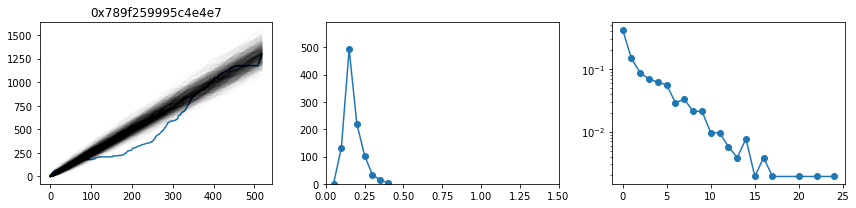

In [19]:

for target in targets[27:28]:
    mc = mc_ts(pair_datasets[target]['t'].tolist())
    mc.find_distr()
    mc.obs_call_array()

    fig, axs = plt.subplots(1,3,figsize=(12,3))

    axs[0].plot([i for i in range(len(mc.obs_calls))],mc.obs_calls)
    errors = []
    for i in range(1000):
        mc.rand_draw()
        mc.calc_error()
        errors.append(mc.e)
        axs[0].plot([i for i in range(len(mc.calls))],mc.calls,c='black',alpha=0.01)
    axs[0].set_title(target)
    axs = plot_hist(errors, axs)
    axs[2].scatter([k for k in mc.pdf_boost.keys()], [v for v in mc.pdf_boost.values()])
    axs[2].plot([k for k in sorted(mc.pdf_boost.keys())], [v for k,v in sorted(mc.pdf_boost.items())])
    axs[2].set_yscale('log')
    plt.tight_layout()
    plt.show()


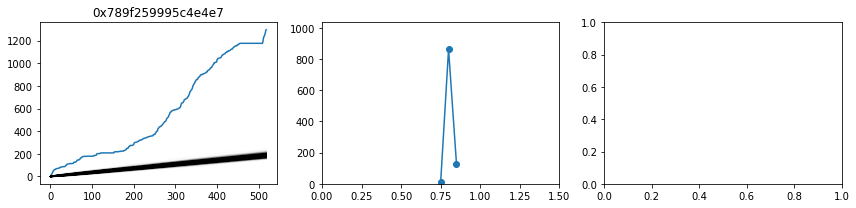

In [49]:

for target in targets[27:28]:
    mc = mc_ts_daily(pair_datasets[target]['t'].tolist())
    mc.find_distr()
    mc.obs_call_array()

    fig, axs = plt.subplots(1,3,figsize=(12,3))

    axs[0].plot([i for i in range(len(mc.obs_calls))],mc.obs_calls)
    errors = []
    for i in range(1000):
        mc.rand_draw()
        mc.calc_error()
        errors.append(mc.e)
        axs[0].plot([i for i in range(len(mc.calls))],mc.calls,c='black',alpha=0.01)
    axs[0].set_title(target)
    axs = plot_hist(errors, axs)
    #axs[2].scatter([k for k in mc.pdf_boost.keys()], [v for v in mc.pdf_boost.values()])
    #axs[2].plot([k for k in sorted(mc.pdf_boost.keys())], [v for k,v in sorted(mc.pdf_boost.items())])
    #axs[2].set_yscale('log')
    plt.tight_layout()
    plt.show()